In [1]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
p_nw = []
p_net_nw = []
loss_nw = []
loss_net_nw = []
bool_nw = []

for network_name in ["Random_ER", "Random_SF", "ChIP_hTFtarget", "ChIP_TIP", "ChIP_TIP_K562", "CoExpr_perturb_0.5", "CoExpr_GTEx_WholeBlood_0.75", "CoExpr_ENCODE_K562_0.75", "BIOGRID", "STRING", "Combine", "NOTEARS_thresholdAdaptive", "DAGMA_thresholdAdaptive"]:
    
    # measurements across 10 random sample split
    p_rs = []
    p_net_rs = []
    loss_rs = []
    loss_net_rs = []
    bool_rs = []
    
    for rs in range(10):
        # read data
        X_train = pd.read_csv("../../result/input_perturb_phyloP/%d/X_train_stratified" % rs, sep="\t", index_col=0).values
        X_valid = pd.read_csv("../../result/input_perturb_phyloP/%d/X_valid_stratified" % rs, sep="\t", index_col=0).values
        X_test = pd.read_csv("../../result/input_perturb_phyloP/%d/X_test_stratified" % rs, sep="\t", index_col=0).values
        Y_test = pd.read_csv("../../result/input_perturb_phyloP/%d/Y_test_stratified" % rs, sep="\t", index_col=0).values.reshape(-1)
        Y_test_gene = pd.read_csv("../../result/input_perturb_phyloP/%d/Y_test_stratified" % rs, sep="\t", index_col=0).index

        test_mask = np.concatenate([[False] * len(X_train), [False] * len(X_valid), [True] * len(X_test)])

        # mask of whether a test node is in the DAGMA graph
        dag = pd.read_csv("../../result/network_perturb_phyloP/DAGMA_thresholdAdaptive.tsv", sep="\t", header=None)
        id2genes = pd.read_csv("../../result/network_perturb_phyloP/valid_genes", sep="\t").set_index("ID")['genes'].to_dict()
        dag[0] = dag[0].map(id2genes)
        dag[1] = dag[1].map(id2genes)
        dag_genes = list(set.union(set(dag[0]), set(dag[1])))
        test_inDAG = Y_test_gene.isin(dag_genes)

        # measurements across 10 random init repeats
        p_rep = []
        p_net_rep = []
        loss_rep = []
        loss_net_rep = []

        for rep in range(10):
            prefix = "../../result/model_perturb_phyloP/%s/%d/model%d" % (network_name, rs, rep)
            with open(prefix+".para", "rb") as f:
                best_params, X1, out, loss1, loss2 = pickle.load(f)
            Y_pred = out[test_mask].reshape(-1)

            loss_rep.append(F.mse_loss(torch.tensor(Y_test), torch.tensor(Y_pred)).item())
            loss_net_rep.append(F.mse_loss(torch.tensor(Y_test[test_inDAG]), torch.tensor(Y_pred[test_inDAG])).item())
            p_rep.append(pearsonr(Y_test, Y_pred)[0])
            p_net_rep.append(pearsonr(Y_test[test_inDAG], Y_pred[test_inDAG])[0])
        bool_rep = ~np.isnan(np.array(p_net_rep))

        p_rs.append(p_rep)
        p_net_rs.append(p_net_rep)
        loss_rs.append(loss_rep)
        loss_net_rs.append(loss_net_rep)
        bool_rs.append(bool_rep)
        
    p_nw.append(p_rs)
    p_net_nw.append(p_net_rs)
    loss_nw.append(loss_rs)
    loss_net_nw.append(loss_net_rs)
    bool_nw.append(bool_rs)

/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/gpfs/slayman/pi/gerstein/jg2447/conda_envs/DAG/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [3]:
p_nw = np.array(p_nw)
p_net_nw = np.array(p_net_nw)
loss_nw = np.array(loss_nw)
loss_net_nw = np.array(loss_net_nw)
bool_nw = np.array(bool_nw)

### all genes

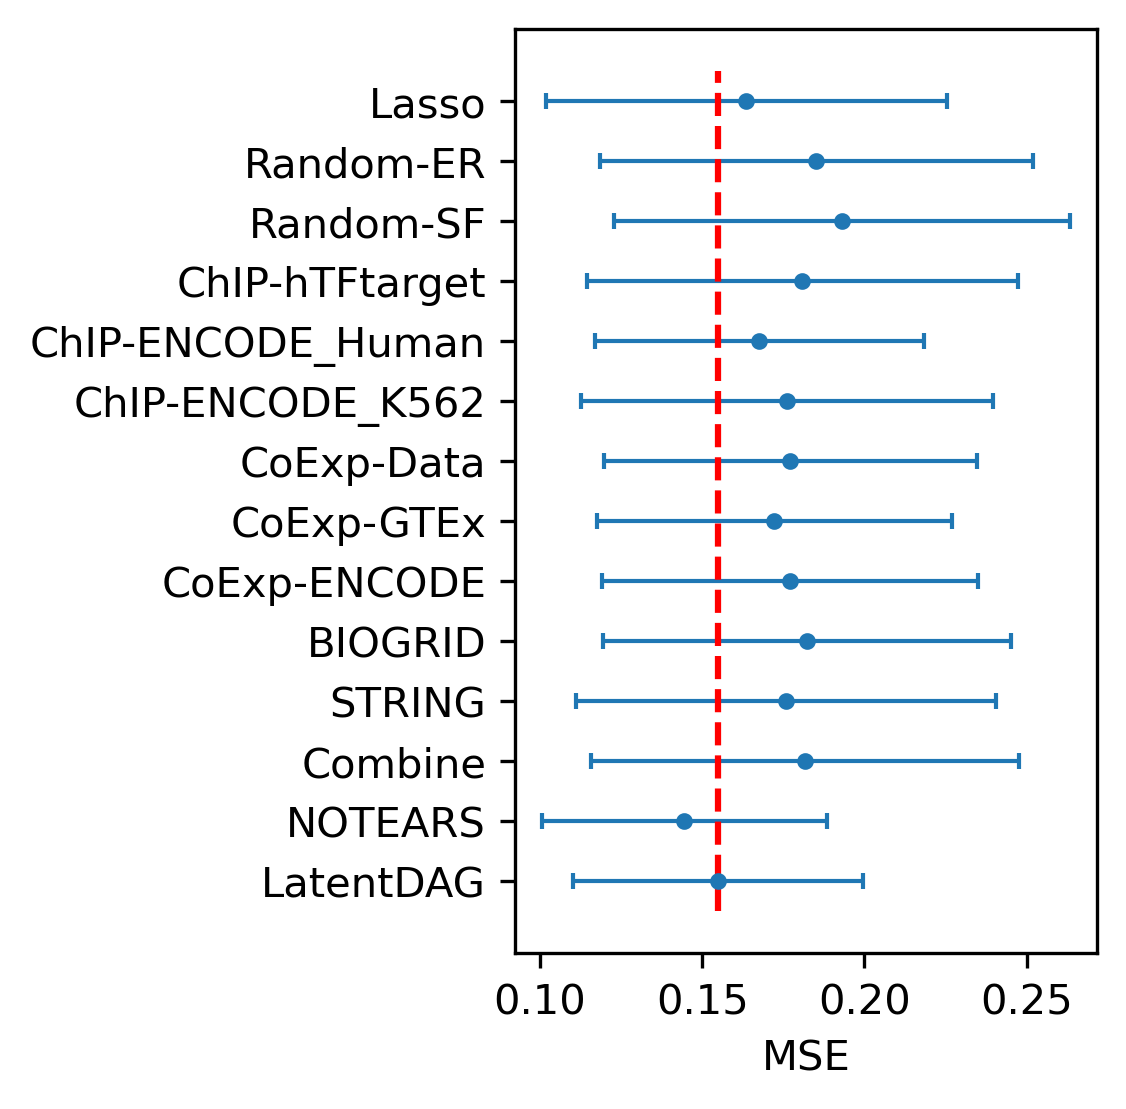

In [4]:
mean_mse = [0.16361379220214434]
std_mse = [0.061838294547170075]
for ii in range(13):
    mean_mse.append(loss_nw[ii,:,:].reshape(-1)[bool_nw[ii,:,:].reshape(-1)].mean())
    std_mse.append(loss_nw[ii,:,:].reshape(-1)[bool_nw[ii,:,:].reshape(-1)].std())

plt.figure(dpi=300, figsize=(2.5, 4))
(_, caps, _) = plt.errorbar(mean_mse[::-1], range(len(mean_mse)), xerr=std_mse[::-1], fmt='.', elinewidth=1, capsize=2)

for cap in caps:
    cap.set_markeredgewidth(1)

ax = plt.gca()
ax.yaxis.set_ticks(range(len(mean_mse)))
ax.yaxis.set_ticklabels(["Lasso", "Random-ER", "Random-SF", "ChIP-hTFtarget", "ChIP-ENCODE_Human", "ChIP-ENCODE_K562", "CoExp-Data", "CoExp-GTEx", "CoExp-ENCODE", "BIOGRID", "STRING", "Combine","NOTEARS", "LatentDAG"][::-1])
ax.set_xlabel("MSE")

ax.vlines(mean_mse[-1], -0.5, len(mean_mse)-0.5, color='red', linestyles='dashed')
plt.savefig("./mse_all.pdf", dpi="figure", bbox_inches="tight")

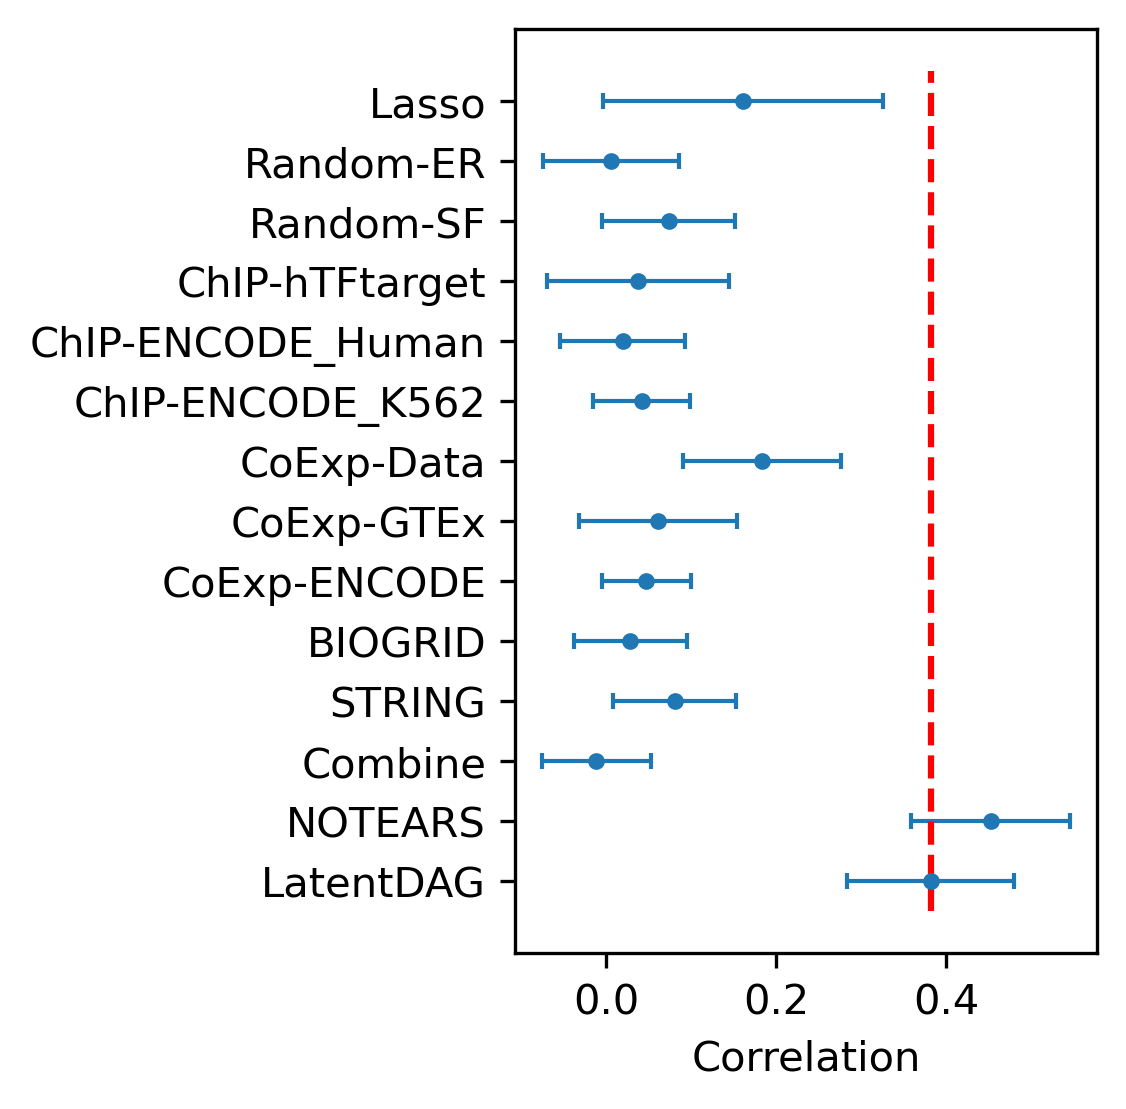

In [5]:
mean_mse = [0.1612640836099545]
std_mse = [0.164969210231839]
for ii in range(13):
    mean_mse.append(p_nw[ii,:,:].reshape(-1)[bool_nw[ii,:,:].reshape(-1)].mean())
    std_mse.append(p_nw[ii,:,:].reshape(-1)[bool_nw[ii,:,:].reshape(-1)].std())

plt.figure(dpi=300, figsize=(2.5, 4))
(_, caps, _) = plt.errorbar(mean_mse[::-1], range(len(mean_mse)), xerr=std_mse[::-1], fmt='.', elinewidth=1, capsize=2)

for cap in caps:
    cap.set_markeredgewidth(1)

ax = plt.gca()
ax.yaxis.set_ticks(range(len(mean_mse)))
ax.yaxis.set_ticklabels(["Lasso", "Random-ER", "Random-SF", "ChIP-hTFtarget", "ChIP-ENCODE_Human", "ChIP-ENCODE_K562", "CoExp-Data", "CoExp-GTEx", "CoExp-ENCODE", "BIOGRID", "STRING", "Combine","NOTEARS", "LatentDAG"][::-1])
ax.set_xlabel("Correlation")

ax.vlines(mean_mse[-1], -0.5, len(mean_mse)-0.5, color='red', linestyles='dashed')
plt.savefig("./p_all.pdf", dpi="figure", bbox_inches="tight")

### dagma genes

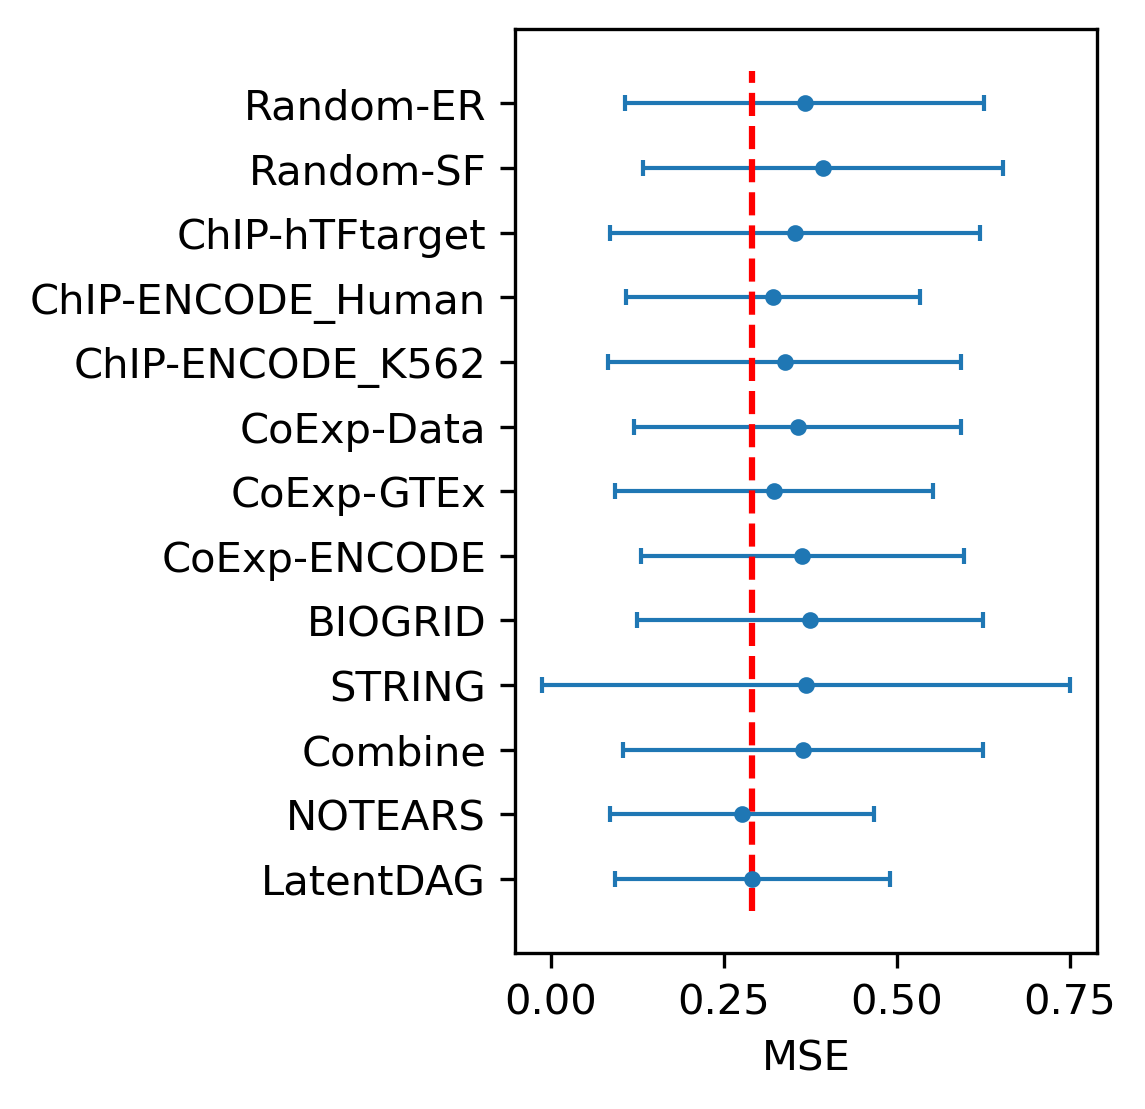

In [6]:
mean_mse = []
std_mse = []
for ii in range(13):
    mean_mse.append(loss_net_nw[ii,:,:].reshape(-1)[bool_nw[ii,:,:].reshape(-1)].mean())
    std_mse.append(loss_net_nw[ii,:,:].reshape(-1)[bool_nw[ii,:,:].reshape(-1)].std())

plt.figure(dpi=300, figsize=(2.5, 4))
(_, caps, _) = plt.errorbar(mean_mse[::-1], range(len(mean_mse)), xerr=std_mse[::-1], fmt='.', elinewidth=1, capsize=2)

for cap in caps:
    cap.set_markeredgewidth(1)

ax = plt.gca()
ax.yaxis.set_ticks(range(len(mean_mse)))
ax.yaxis.set_ticklabels(["Random-ER", "Random-SF", "ChIP-hTFtarget", "ChIP-ENCODE_Human", "ChIP-ENCODE_K562", "CoExp-Data", "CoExp-GTEx", "CoExp-ENCODE", "BIOGRID", "STRING", "Combine","NOTEARS", "LatentDAG"][::-1])
ax.set_xlabel("MSE")

ax.vlines(mean_mse[-1], -0.5, len(mean_mse)-0.5, color='red', linestyles='dashed')
plt.savefig("./mse_net.pdf", dpi="figure", bbox_inches="tight")

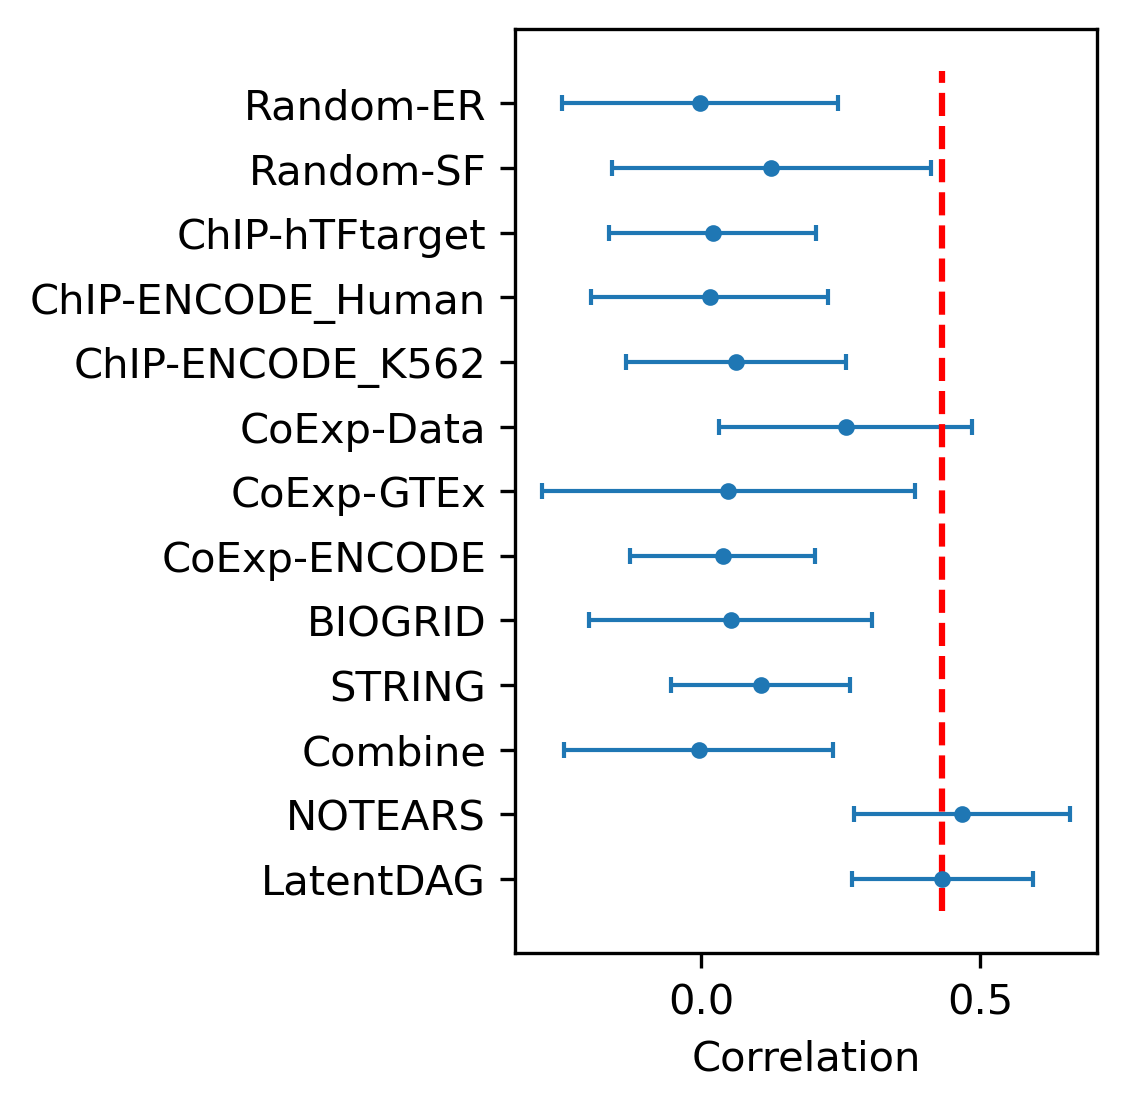

In [7]:
mean_mse = []
std_mse = []
for ii in range(13):
    mean_mse.append(p_net_nw[ii,:,:].reshape(-1)[bool_nw[ii,:,:].reshape(-1)].mean())
    std_mse.append(p_net_nw[ii,:,:].reshape(-1)[bool_nw[ii,:,:].reshape(-1)].std())

plt.figure(dpi=300, figsize=(2.5, 4))
(_, caps, _) = plt.errorbar(mean_mse[::-1], range(len(mean_mse)), xerr=std_mse[::-1], fmt='.', elinewidth=1, capsize=2)

for cap in caps:
    cap.set_markeredgewidth(1)

ax = plt.gca()
ax.yaxis.set_ticks(range(len(mean_mse)))
ax.yaxis.set_ticklabels(["Random-ER", "Random-SF", "ChIP-hTFtarget", "ChIP-ENCODE_Human", "ChIP-ENCODE_K562", "CoExp-Data", "CoExp-GTEx", "CoExp-ENCODE", "BIOGRID", "STRING", "Combine","NOTEARS", "LatentDAG"][::-1])
ax.set_xlabel("Correlation")

ax.vlines(mean_mse[-1], -0.5, len(mean_mse)-0.5, color='red', linestyles='dashed')
plt.savefig("./p_net.pdf", dpi="figure", bbox_inches="tight")

### significance

In [8]:
from scipy.stats import ttest_ind
from scipy.stats import ttest_ind_from_stats

In [9]:
for ii in range(12):
    a1 = loss_nw[ii,:,:].reshape(-1)[bool_nw[ii,:,:].reshape(-1)]
    a2 = loss_nw[-1,:,:].reshape(-1)[bool_nw[-1,:,:].reshape(-1)]
    print(ttest_ind(a1, a2, equal_var=False))

Ttest_indResult(statistic=2.9898618345468924, pvalue=0.0036837355191806265)
Ttest_indResult(statistic=3.7261443316645444, pvalue=0.0003452733819049799)
Ttest_indResult(statistic=3.026029162545011, pvalue=0.0029421600032151865)
Ttest_indResult(statistic=1.7203424747016087, pvalue=0.08742590070052492)
Ttest_indResult(statistic=2.4790039718925487, pvalue=0.014420022162513188)
Ttest_indResult(statistic=2.92955421697156, pvalue=0.0038662277328017944)
Ttest_indResult(statistic=2.170551070561355, pvalue=0.03178331224033386)
Ttest_indResult(statistic=2.855921725174683, pvalue=0.004863341169301179)
Ttest_indResult(statistic=3.0181226504864824, pvalue=0.0031963927570058132)
Ttest_indResult(statistic=2.368742768860136, pvalue=0.019373647525438)
Ttest_indResult(statistic=3.276110715028688, pvalue=0.0012826442544652068)
Ttest_indResult(statistic=-1.622453000683266, pvalue=0.10633289163756827)


In [10]:
ttest_ind_from_stats(mean1=0.16361379220214434, std1=0.061838294547170075, mean2=loss_nw[-1,:,:].reshape(-1)[bool_nw[-1,:,:].reshape(-1)].mean(), std2=loss_nw[-1,:,:].reshape(-1)[bool_nw[-1,:,:].reshape(-1)].std(), nobs1=10, nobs2=bool_nw[-1,:,:].sum(), equal_var=False)

Ttest_indResult(statistic=0.43744121214540205, pvalue=0.6710903622562812)

In [11]:
for ii in range(12):
    a1 = loss_nw[ii,:,:].reshape(-1)[bool_nw[ii,:,:].reshape(-1)]
    a2 = loss_nw[-2,:,:].reshape(-1)[bool_nw[-2,:,:].reshape(-1)]
    print(ttest_ind(a1, a2, equal_var=False))

Ttest_indResult(statistic=4.03156014807039, pvalue=0.00012514069354410155)
Ttest_indResult(statistic=4.757927253447381, pvalue=7.894378176883996e-06)
Ttest_indResult(statistic=4.262280367753603, pvalue=3.700926433650563e-05)
Ttest_indResult(statistic=3.145174842623043, pvalue=0.002005813706953099)
Ttest_indResult(statistic=3.7170282240710764, pvalue=0.00029738965821666337)
Ttest_indResult(statistic=4.3319798639148335, pvalue=2.5502865921981906e-05)
Ttest_indResult(statistic=3.4933152499126465, pvalue=0.0006564461072237149)
Ttest_indResult(statistic=4.228861552995359, pvalue=3.974693515938726e-05)
Ttest_indResult(statistic=4.178612779188012, pvalue=6.18981463040207e-05)
Ttest_indResult(statistic=3.571087375585246, pvalue=0.0005079012094068689)
Ttest_indResult(statistic=4.579089276515375, pvalue=9.231929808419109e-06)
Ttest_indResult(statistic=0.0, pvalue=1.0)


In [12]:
ttest_ind_from_stats(mean1=0.16361379220214434, std1=0.061838294547170075, mean2=loss_nw[-2,:,:].reshape(-1)[bool_nw[-2,:,:].reshape(-1)].mean(), std2=loss_nw[-2,:,:].reshape(-1)[bool_nw[-2,:,:].reshape(-1)].std(), nobs1=10, nobs2=bool_nw[-2,:,:].sum(), equal_var=False)

Ttest_indResult(statistic=0.9537542934260741, pvalue=0.3628276979615572)

###### pearson

In [13]:
for ii in range(12):
    a1 = p_nw[ii,:,:].reshape(-1)[bool_nw[ii,:,:].reshape(-1)]
    a2 = p_nw[-1,:,:].reshape(-1)[bool_nw[-1,:,:].reshape(-1)]
    print(ttest_ind(a1, a2, equal_var=False))

Ttest_indResult(statistic=-25.399156438963118, pvalue=1.852390503448409e-52)
Ttest_indResult(statistic=-21.51994608290463, pvalue=1.065787401410661e-46)
Ttest_indResult(statistic=-22.261066234025186, pvalue=3.1903177009812796e-52)
Ttest_indResult(statistic=-27.606713160520172, pvalue=7.669903901752435e-65)
Ttest_indResult(statistic=-28.55374603251827, pvalue=2.8098256538850804e-64)
Ttest_indResult(statistic=-14.149233835629106, pvalue=2.8102367381149367e-31)
Ttest_indResult(statistic=-21.296886480340067, pvalue=1.3357889716625275e-47)
Ttest_indResult(statistic=-29.032438041183866, pvalue=1.859356891659584e-63)
Ttest_indResult(statistic=-27.072506815974585, pvalue=2.1375466556879474e-61)
Ttest_indResult(statistic=-22.98543160699339, pvalue=5.394959815242144e-54)
Ttest_indResult(statistic=-32.79798226069727, pvalue=2.534754382058494e-74)
Ttest_indResult(statistic=5.140115857556426, pvalue=6.702247582082732e-07)


In [14]:
ttest_ind_from_stats(mean1=0.1612640836099545, std1=0.164969210231839, mean2=p_nw[-1,:,:].reshape(-1)[bool_nw[-1,:,:].reshape(-1)].mean(), std2=p_nw[-1,:,:].reshape(-1)[bool_nw[-1,:,:].reshape(-1)].std(), nobs1=10, nobs2=bool_nw[-1,:,:].sum(), equal_var=False)

Ttest_indResult(statistic=-4.1515606426567455, pvalue=0.0021231036567803453)

In [15]:
for ii in range(12):
    a1 = p_nw[ii,:,:].reshape(-1)[bool_nw[ii,:,:].reshape(-1)]
    a2 = p_nw[-2,:,:].reshape(-1)[bool_nw[-2,:,:].reshape(-1)]
    print(ttest_ind(a1, a2, equal_var=False))

Ttest_indResult(statistic=-30.99707992823971, pvalue=8.461602644039213e-61)
Ttest_indResult(statistic=-27.233196012452, pvalue=1.4236454849816394e-57)
Ttest_indResult(statistic=-27.504749769295575, pvalue=1.139904534673739e-63)
Ttest_indResult(statistic=-34.16298380903544, pvalue=8.610018258854599e-79)
Ttest_indResult(statistic=-35.98453017286056, pvalue=4.878796476448548e-80)
Ttest_indResult(statistic=-19.76885281205965, pvalue=1.5676612285538878e-47)
Ttest_indResult(statistic=-26.68182560771115, pvalue=1.5885405976523456e-58)
Ttest_indResult(statistic=-36.80913421755056, pvalue=2.0177751974568716e-79)
Ttest_indResult(statistic=-33.649593022962534, pvalue=2.578834681837594e-74)
Ttest_indResult(statistic=-29.391697755502094, pvalue=6.177508848466148e-69)
Ttest_indResult(statistic=-40.34190005106081, pvalue=3.0648790866580853e-90)
Ttest_indResult(statistic=0.0, pvalue=1.0)


In [16]:
ttest_ind_from_stats(mean1=0.1612640836099545, std1=0.164969210231839, mean2=p_nw[-2,:,:].reshape(-1)[bool_nw[-2,:,:].reshape(-1)].mean(), std2=p_nw[-2,:,:].reshape(-1)[bool_nw[-2,:,:].reshape(-1)].std(), nobs1=10, nobs2=bool_nw[-2,:,:].sum(), equal_var=False)

Ttest_indResult(statistic=-5.495182219493984, pvalue=0.0003056208007492565)

### dagma genes

In [18]:
for ii in range(12):
    a1 = loss_net_nw[ii,:,:].reshape(-1)[bool_nw[ii,:,:].reshape(-1)]
    a2 = loss_net_nw[-1,:,:].reshape(-1)[bool_nw[-1,:,:].reshape(-1)]
    print(ttest_ind(a1, a2, equal_var=False))

Ttest_indResult(statistic=1.8529084605771746, pvalue=0.06716308974891394)
Ttest_indResult(statistic=2.563538793810407, pvalue=0.011869248978208097)
Ttest_indResult(statistic=1.7177117019408232, pvalue=0.08789027771652186)
Ttest_indResult(statistic=0.9387668942645427, pvalue=0.34930030022490366)
Ttest_indResult(statistic=1.307843352144712, pvalue=0.19302162882984558)
Ttest_indResult(statistic=2.024209087251081, pvalue=0.04447207998949648)
Ttest_indResult(statistic=0.8971049589482356, pvalue=0.37125818117512455)
Ttest_indResult(statistic=2.2207700561829338, pvalue=0.02770208833190197)
Ttest_indResult(statistic=2.223765539583041, pvalue=0.028141209510910533)
Ttest_indResult(statistic=1.5830118439685512, pvalue=0.11643350006434743)
Ttest_indResult(statistic=2.1823405403148946, pvalue=0.03040801589612631)
Ttest_indResult(statistic=-0.5341074722000353, pvalue=0.5938809364422364)


In [20]:
for ii in range(12):
    a1 = loss_net_nw[ii,:,:].reshape(-1)[bool_nw[ii,:,:].reshape(-1)]
    a2 = loss_net_nw[-2,:,:].reshape(-1)[bool_nw[-2,:,:].reshape(-1)]
    print(ttest_ind(a1, a2, equal_var=False))

Ttest_indResult(statistic=2.248127494330654, pvalue=0.02709563111191989)
Ttest_indResult(statistic=2.9774725573753527, pvalue=0.003686065596237329)
Ttest_indResult(statistic=2.1717032178320834, pvalue=0.031479162019584006)
Ttest_indResult(statistic=1.4382061000313753, pvalue=0.15242613101029642)
Ttest_indResult(statistic=1.7580932644780656, pvalue=0.08093596114646268)
Ttest_indResult(statistic=2.5377115212938195, pvalue=0.012049304549538216)
Ttest_indResult(statistic=1.3560997162269215, pvalue=0.1774054145492093)
Ttest_indResult(statistic=2.7347399687071534, pvalue=0.006926922565579711)
Ttest_indResult(statistic=2.6618735747246784, pvalue=0.008940072545351225)
Ttest_indResult(statistic=1.9058292806147712, pvalue=0.059488966014848266)
Ttest_indResult(statistic=2.6749732013301, pvalue=0.008193114688730893)
Ttest_indResult(statistic=0.0, pvalue=1.0)


In [21]:
for ii in range(12):
    a1 = p_net_nw[ii,:,:].reshape(-1)[bool_nw[ii,:,:].reshape(-1)]
    a2 = p_net_nw[-1,:,:].reshape(-1)[bool_nw[-1,:,:].reshape(-1)]
    print(ttest_ind(a1, a2, equal_var=False))

Ttest_indResult(statistic=-11.563218389152512, pvalue=8.601045572872542e-19)
Ttest_indResult(statistic=-7.480696761287182, pvalue=7.882672599315384e-11)
Ttest_indResult(statistic=-15.690642253851653, pvalue=1.2812317358267656e-34)
Ttest_indResult(statistic=-14.100657086552303, pvalue=1.986134482842912e-28)
Ttest_indResult(statistic=-13.229874510997151, pvalue=7.267979132418029e-27)
Ttest_indResult(statistic=-5.939346531193714, pvalue=1.7291212722183226e-08)
Ttest_indResult(statistic=-8.800407149765013, pvalue=7.43779578813799e-14)
Ttest_indResult(statistic=-16.101148364650964, pvalue=1.5958558226537554e-36)
Ttest_indResult(statistic=-10.555159138325019, pvalue=8.74663908783653e-18)
Ttest_indResult(statistic=-13.050860534535232, pvalue=5.913935509882699e-27)
Ttest_indResult(statistic=-14.619929071551626, pvalue=1.567745706390009e-31)
Ttest_indResult(statistic=1.3743264313198076, pvalue=0.17096465018357596)


In [22]:
for ii in range(12):
    a1 = p_net_nw[ii,:,:].reshape(-1)[bool_nw[ii,:,:].reshape(-1)]
    a2 = p_net_nw[-2,:,:].reshape(-1)[bool_nw[-2,:,:].reshape(-1)]
    print(ttest_ind(a1, a2, equal_var=False))

Ttest_indResult(statistic=-12.042460061511083, pvalue=1.5751600077125155e-20)
Ttest_indResult(statistic=-8.080972227538252, pvalue=2.7797092197613388e-12)
Ttest_indResult(statistic=-15.821402740600737, pvalue=8.542621156912728e-36)
Ttest_indResult(statistic=-14.416381636186218, pvalue=2.535443977197318e-30)
Ttest_indResult(statistic=-13.570037957273684, pvalue=1.3464712144741757e-28)
Ttest_indResult(statistic=-6.726559281981117, pvalue=2.35176782030073e-10)
Ttest_indResult(statistic=-9.343127706906408, pvalue=2.4300547724803728e-15)
Ttest_indResult(statistic=-16.12737322996817, pvalue=5.57089763163774e-37)
Ttest_indResult(statistic=-11.075310495145452, pvalue=1.4334096602170421e-19)
Ttest_indResult(statistic=-13.338227571732755, pvalue=2.9779633633205334e-28)
Ttest_indResult(statistic=-14.910731774009381, pvalue=2.827566405320547e-33)
Ttest_indResult(statistic=0.0, pvalue=1.0)
